In [55]:
import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
import tensorflow as tf

keras = tf.keras

In [57]:
%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv('Reviews1.csv')

In [59]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [60]:
review_data = df[['UserId', 'ProductId', 'Score','Summary','Text']]

In [61]:
review_data.head()

,UserId,ProductId,Score,Summary,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


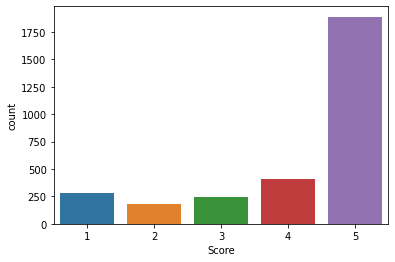

In [62]:
sbn.countplot(review_data['Score'])

In [63]:
def data_clean( rev, remove_stopwords=True): 

    new_text = re.sub("[^a-zA-Z]"," ", rev) #replace regex apart from english alphabets with ' '
    words = new_text.lower().split()
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))  #stem the words to retain the root/base word
    return(ary)

In [64]:
clean_reviewData = []
for rev in review_data['Text']:
    clean_reviewData.append( " ".join(data_clean(rev)))

clean_summaryData = []
for rev in review_data['Summary']:
    clean_summaryData.append( " ".join(data_clean(rev)))

In [65]:
Most_used_Words_Review =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

br         3364
like       1437
flavor     1369
tast       1254
chip       1216
good       1084
product     993
love        960
one         930
great       906
tri         847
use         821
tea         752
bag         745
food        716
make        616
get         606
eat         553
order       538
realli      531
dtype: int64


In [66]:
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[:20]
print (Most_used_Words_Summary)

great      402
good       256
best       214
chip       196
tast       194
love       187
delici     112
tea        108
product    101
flavor     100
food        74
ever        71
excel       70
yummi       69
coffe       69
tasti       67
dog         66
favorit     56
like        56
price       53
dtype: int64


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
#min_df is the threshold above which words are to be considered
#max_features is used to build vocabulary with top max_features
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(clean_reviewData)
print(test_vecor)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names(), text_vectorizer.idf_))
print(tfidf_vector)

  (0, 85)	0.361576128474339
  (0, 810)	0.27521879635556235
  (0, 539)	0.2993208704802744
  (0, 696)	0.3092523287912508
  (0, 496)	0.1212111739042072
  (0, 510)	0.19512217146659916
  (0, 707)	0.2228708848948376
  (0, 382)	0.13208228028440147
  (0, 351)	0.20232438574563788
  (0, 698)	0.4354638186636946
  (0, 346)	0.17665816632279474
  (0, 265)	0.23136418417619917
  (0, 132)	0.2589439218495502
  (0, 784)	0.25460432854668835
  (0, 103)	0.20304840272237437
  (1, 944)	0.36631043444292416
  (1, 870)	0.23813366806308553
  (1, 804)	0.233975328661809
  (1, 808)	0.23774347884298752
  (1, 3)	0.24345197087878556
  (1, 645)	0.5924607634116343
  (1, 751)	0.21530165178533953
  (1, 476)	0.2884913957800785
  (1, 45)	0.2568168935778304
  (1, 698)	0.303359495918006
  :	:
  (2998, 364)	0.21946194969006805
  (2998, 525)	0.22106450857406004
  (2998, 121)	0.22825858848264252
  (2998, 113)	0.20419438394679024
  (2998, 206)	0.5129055133671485
  (2998, 228)	0.19750389689730502
  (2998, 892)	0.21233614622857802
 

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = review_data.Text[:10]
for test in sample_review:
    ss = analyser.polarity_scores(test)
    #dict consists of compound[-1,1], neg, neu and pos scores for a sentence
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.9441, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
compound: -0.5664, 
neg: 0.138, 
neu: 0.862, 
pos: 0.0, 
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
compound: 0.8265, 
neg: 0.091, 
neu: 0.754, 
pos: 0.155, 
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis'

In [69]:
from sklearn.cluster import MiniBatchKMeans

clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(test_vecor)
kmodel_clusters = kmodel.predict(test_vecor)
kmodel_distances = kmodel.transform(test_vecor)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 tea
 drink
 green
 ice
 br

Cluster 1:
 br
 flavor
 like
 chip
 product

Cluster 2:
 chip
 bag
 flavor
 salt
 potato

Cluster 3:
 cereal
 famili
 flour
 box
 pocki

Cluster 4:
 product
 order
 amazon
 price
 ship

Cluster 5:
 box
 order
 lollipop
 bag
 pack

Cluster 6:
 dog
 food
 cat
 treat
 eat

Cluster 7:
 real
 good
 orang
 product
 realli

Cluster 8:
 coffe
 cup
 tast
 bold
 roast

Cluster 9:
 snack
 tast
 calori
 great
 love

Cluster 10:
 popcorn
 pop
 kernel
 popper
 white

Cluster 11:
 babi
 son
 food
 formula
 love

Cluster 12:
 tomato
 can
 clam
 chowder
 soup

Cluster 13:
 local
 store
 groceri
 find
 price

Cluster 14:
 waffl
 mix
 pancak
 make
 stonewal

Cluster 15:
 flavor
 one
 good
 like
 love

Cluster 16:
 water
 coconut
 drink
 pineappl
 use

Cluster 17:
 chocol
 pasta
 tast
 melt
 great

Cluster 18:
 fruit
 dri
 frozen
 pouch
 veggi

Cluster 19:
 sugar
 use
 good
 raw
 great



In [70]:
test_reviewText = review_data.Text
test_Ratings = review_data.Score
text_vectorizer = TfidfVectorizer(max_df=.8)
text_vectorizer.fit(test_reviewText)
def rate(r):
    ary2 = []
    for rating in r:
        tv = [0,0,0,0,0]
        tv[rating-1] = 1
        ary2.append(tv)
    return np.array(ary2)

In [71]:
test_reviewText =test_reviewText[:3001]
test_reviewText

0       I have bought several of the Vitality canned d...
1       Product arrived labeled as Jumbo Salted Peanut...
2       This is a confection that has been around a fe...
3       If you are looking for the secret ingredient i...
4       Great taffy at a great price.  There was a wid...
                              ...                        
2994    The cookies were kind of stail but other than ...
2995    My primary reason for ordering, was the pictur...
2996    The cookie is crispy good and flavorful.  The ...
2997    I was expecting these cookies were going to be...
2998    I ordered these fortune cookies as rewards for...
Name: Text, Length: 2999, dtype: object

In [72]:
test_Ratings = test_Ratings[:3001]
test_Ratings

0       5
1       1
2       4
3       2
4       5
       ..
2994    4
2995    4
2996    5
2997    2
2998    5
Name: Score, Length: 2999, dtype: int64

In [73]:
X = text_vectorizer.transform(test_reviewText).toarray()
print(X.shape)
y = rate(test_Ratings.values)
print(y.shape)

(2999, 10419)
(2999, 5)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
model.add(Dense(64,input_dim=X_train.shape[1]))
# model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                666880    
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 325       
Total params: 667,205
Trainable params: 667,205
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
75/75 [==============================] - 1s 11ms/step - loss: 1.2570 - accuracy: 0.6203 - val_loss: 1.1303 - val_accuracy: 0.6317
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.9901 - accuracy: 0.6290 - val_loss: 1.0378 - val_accuracy: 0.6333
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.7959 - accuracy: 0.6636 - val_loss: 0.9575 - val_accuracy: 0.6583
Epoch 4/10
75/75 [==============================] - 1s 9ms/step - loss: 0.6046 - ac

0.675000011920929

In [97]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

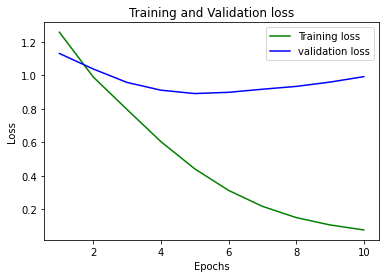

In [98]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

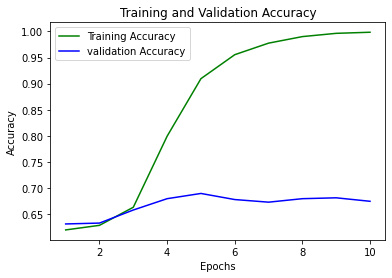

In [99]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()